<a href="https://colab.research.google.com/github/dylan-govender/COMP721-Machine-Learning-Project/blob/main/Game_Outcome_Prediction_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**basketballreference.com stats download 1.1**
---

last updated: 9/12/2005

***

**All stats contained in this download are free to use under the following conditions:**
---
1. Please reference basketballreference.com in all places, print or online, where the stats are used.

2. Report any errors found in this download to support@basketballreference.com. If these stats help you out then help others by making this the best statistical archive online.

***

**All player season stats include the 2004-05 regular season and playoff stats:**
---
- NBA Draft is only through the 2004 draft
- All-Star games are only through the 2003-04 season
- Coaching records do not include 2004-05 season

***

**This download contains the following comma delimited files:**
---
- **players.txt** - list of all players
- **player_regular_season.txt** - regular season player stats
- **player_regular_season_career.txt** - regular season career totals by player
- **player_playoffs.txt** - playoff stats for all players
- **player_playoffs_career.txt** - career playoff stats by player
- **player_allstar.txt** - all-star stats by player
- **teams.txt** - list of all teams
- **team_season.txt** - regular season team stats
- **draft.txt** - nba and aba draft results by year
- **coaches_season.txt** - nba coaching records by season
- **coaches_career.txt** - nba career coaching records

***

**A few notes about the stats:**
---
Steals, blocks and turnovers were not official nba stats until the 70's. Those stats are listed as zero for earlier season.

These stats are accurate to the best of our knowledge.  We make no guarantees about their accuracy and there are still some errors in the data which we are trying to fix. We cannot be held responsible for any damage arising from the use of these stats. Please use at your own risk.

**support@basketballreference.com**

# **0. Importing Datasets and Dependencies**

In [4]:
#@title **0.1 Importing Dependencies**

import pandas as pd
import numpy as np

In [5]:
#@title **0.2 Importing the Data**

import pandas as pd

# Load each dataset
players = pd.read_csv('players.txt')
player_allstar = pd.read_csv('player_allstar.txt')
player_regular_season = pd.read_csv('player_regular_season.txt')
player_regular_season_career = pd.read_csv('player_regular_season_career.txt')
player_playoffs = pd.read_csv('player_playoffs.txt')
player_playoffs_career = pd.read_csv('player_playoffs_career.txt')

draft = pd.read_csv('draft.txt', encoding='ISO-8859-1', on_bad_lines='skip')
coaches_season = pd.read_csv('coaches_season.txt')
coaches_career = pd.read_csv('coaches_career.txt')

teams = pd.read_csv('teams.txt')
team_season = pd.read_csv('team_season.txt')

# **1. Displaying Datasets**

In [6]:
players.head()

,ilkid,firstname,lastname,position,firstseason,lastseason,h_feet,h_inches,weight,college,birthdate
0,ABDELAL01,Alaa,Abdelnaby,F,1990,1994,6.0,10.0,240.0,Duke,1968-06-24 00:00:00
1,ABDULKA01,Kareem,Abdul-jabbar,C,1969,1988,7.0,2.0,225.0,UCLA,1947-04-16 00:00:00
2,ABDULMA01,Mahmo,Abdul-rauf,G,1990,2000,6.0,1.0,162.0,LSU,1969-03-09 00:00:00
3,ABDULTA01,Tariq,Abdul-wahad,G,1997,2002,6.0,6.0,223.0,Michigan,1974-11-03 00:00:00
4,ABDURSH01,Shareef,Abdur-rahim,F,1996,2004,6.0,9.0,225.0,California,1976-12-11 00:00:00


In [7]:
player_regular_season.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABRAMJO01,1946,John,Abramovic,PIT,N,47,0,527,0,...,0,0,0.0,161,834,202,178,123,0,0
1,AUBUCCH01,1946,Chet,Aubuchon,DE1,N,30,0,65,0,...,0,0,0.0,46,91,23,35,19,0,0
2,BAKERNO01,1946,Norm,Baker,CH1,N,4,0,0,0,...,0,0,0.0,0,1,0,0,0,0,0
3,BALTIHE01,1946,Herschel,Baltimore,ST1,N,58,0,138,0,...,0,0,0.0,98,263,53,69,32,0,0
4,BARRJO01,1946,John,Barr,ST1,N,58,0,295,0,...,0,0,0.0,164,438,124,79,47,0,0


In [8]:
player_regular_season_career.head()

,ilkid,firstname,lastname,leag,gp,minutes,pts,oreb,dreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,256,3200,1465,283,563,846,...,71,69,247,484,1236,620,321,225,3,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,1560,57446,38387,2975,9394,17440,...,1160,3189,2527,4657,28307,15837,9304,6712,18,1
2,ABDULMA01,Mahmo,Abdul-rauf,N,586,15633,8553,219,868,1087,...,487,46,963,1107,7943,3514,1161,1051,1339,474
3,ABDULTA01,Tariq,Abdul-wahad,N,236,4808,1830,275,501,776,...,184,82,309,485,1726,720,529,372,76,18
4,ABDURSH01,Shareef,Abdur-rahim,N,672,24862,13338,1498,3976,5474,...,718,556,1911,1845,10215,4789,4427,3614,477,146


In [9]:
player_playoffs.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,dreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ARMSTPA01,1949,Paul,Armstrong,FTW,N,3,0,9,0,...,0,0,0,6,22,4,4,1,0,0
1,BARKECL01,1949,Cliff,Barker,INI,N,6,0,34,0,...,0,0,0,10,31,12,15,10,0,0
2,BARNHLE01,1949,Leo,Barnhorst,CH1,N,2,0,22,0,...,0,0,0,10,25,8,6,6,0,0
3,BEARDRA01,1949,Ralph,Beard,INI,N,5,0,66,0,...,0,0,0,11,70,22,28,22,0,0
4,BLACKCH01,1949,Charlie,Black,AND,N,8,0,57,0,...,0,0,0,38,61,18,29,21,0,0


In [10]:
player_playoffs_career.head()

,ilkid,firstname,lastname,leag,gp,minutes,pts,dreb,oreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,17,106,38,17,3,20,...,0,1,11,11,40,18,4,2,0,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,237,8851,5762,833,355,2481,...,150,399,404,787,4422,2356,1419,1050,4,0
2,ABDULMA01,Mahmo,Abdul-rauf,N,15,415,195,18,5,23,...,7,1,22,37,187,69,45,43,49,14
3,ABDULTA01,Tariq,Abdul-wahad,N,13,178,68,24,17,41,...,4,4,4,14,63,24,24,20,3,0
4,ABERNTO01,Tom,Abernethy,N,13,226,68,0,0,42,...,0,0,0,18,54,22,29,24,0,0


In [11]:
player_allstar.head()

,ilkid,year,firstname,lastname,conference,leag,gp,minutes,pts,dreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,AbdulKa01,1978,Karem,Abdul-Jabbar,west,N,1,28,11.0,NaN,...,NaN,NaN,NaN,NaN,12.0,5.0,2.0,1.0,NaN,NaN
1,AbdulKa01,1969,Karem,Abdul-Jabbar,east,N,1,18,10.0,NaN,...,NaN,NaN,NaN,NaN,8.0,4.0,2.0,2.0,NaN,NaN
2,AbdulKa01,1988,Kareem,Abdul-Jabbar,west,N,1,13,4.0,NaN,...,NaN,NaN,NaN,NaN,6.0,1.0,2.0,2.0,NaN,NaN
3,AbdulKa01,1987,Kareem,Abdul-Jabbar,west,N,1,14,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN
4,AbdulKa01,1986,Kareem,Abdul-Jabbar,west,N,1,27,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN


In [12]:
teams.head()

,team,location,name,leag
0,ANA,Anaheim,Amigos,A
1,AND,Anderson,Duffey Packers,N
2,ATL,Atlanta,Hawks,N
3,BA1,Baltimore,Bullets,N
4,BAL,Baltimore,Bullets,N


In [13]:
team_season.head()

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,...,0,0,0,0,0,0,3900,0.0,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,...,0,0,0,0,0,0,4471,0.0,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,...,0,0,0,0,0,0,4308,0.0,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,...,0,0,0,0,0,0,3918,0.0,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,...,0,0,0,0,0,0,3840,0.0,33,27


In [14]:
draft.head()

,draft_year,draft_round,selection,team,firstname,lastname,ilkid,draft_from,leag
0,1947,0,0,ba1,Larry,Killick,NaN,Vermont,N
1,1947,0,0,ba1,Bob,Jake,NaN,Vermont,N
2,1947,0,0,ba1,John,Rusinko,NaN,Penn State,N
3,1947,0,0,ba1,Harry,Gallatin,GallaHa01,NE Missouri State Teachers College,N
4,1947,0,0,ba1,Charles,Raynor,NaN,Houston,N


In [15]:
coaches_career.head()

,coachid,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss
0,ADELMRI01,Rick,Adelman,658,411,67,60
1,ADUBARI01,Richie,Adubato,127,240,3,5
2,AINGEDA01,Danny,Ainge,136,90,3,9
3,ALBECST01,Stan,Albeck,307,267,18,26
4,ARMSTPA01,Paul,Armstrong,22,32,0,0


In [16]:
coaches_season.head()

,coachid,year,yr_order,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,team
0,RUSSEJO01,1946,1,John,Russell,22,38,0,0,BOS
1,OLSENHA01,1946,1,Harold,Olsen,39,22,5,6,CH1
2,DEHNEDU01,1946,1,Dutch,Dehnert,17,20,0,0,CL1
3,CLIFFRO01,1946,2,Roy,Clifford,13,10,1,2,CL1
4,CURTIGL01,1946,1,Glenn,Curtis,12,22,0,0,DE1


# **2. Preprocessing Datasets**

In [17]:
#@title **2.0 Data Preprocessing**
#@markdown - Uppercasing Data in Columns for Consistency and Replacing NaN Values in Datasets
player_regular_season['ilkid'] = player_regular_season['ilkid'].str.upper()
player_regular_season['team'] = player_regular_season['team'].str.upper()
player_regular_season_career['ilkid'] = player_regular_season_career['ilkid'].str.upper()

player_playoffs['team'] = player_playoffs['team'].str.upper()
player_playoffs['ilkid'] = player_playoffs['ilkid'].str.upper()
player_playoffs_career['ilkid'] = player_playoffs_career['ilkid'].str.upper()
player_allstar['ilkid'] = player_allstar['ilkid'].str.upper()

teams['team'] = teams['team'].str.upper()
team_season['team'] = team_season['team'].str.upper()

draft['ilkid'] = draft['ilkid'].str.upper()
draft['team'] = draft['team'].str.upper()

coaches_career['coachid'] = coaches_career['coachid'].str.upper()
coaches_season['team'] = coaches_season['team'].str.upper()
coaches_season['coachid'] = coaches_season['coachid'].str.upper()

def replace_nan_with_zero(df):
    """
    Replace NaN values with 0 in all numeric columns of the DataFrame.
    """
    # Iterate over all numeric columns in the DataFrame
    for col in df.select_dtypes(include=[np.number]).columns:
        # Replace NaN values with 0 (without inplace=True)
        df[col] = df[col].fillna(0)

    return df

replace_nan_with_zero(players)
replace_nan_with_zero(player_allstar)
replace_nan_with_zero(player_regular_season)
replace_nan_with_zero(player_regular_season_career)
replace_nan_with_zero(player_playoffs)
replace_nan_with_zero(player_playoffs_career)
replace_nan_with_zero(draft)
replace_nan_with_zero(coaches_season)
replace_nan_with_zero(coaches_career)
replace_nan_with_zero(teams)
replace_nan_with_zero(team_season)

from IPython.display import clear_output
clear_output(wait=True)

In [18]:
#@title **2.1 Calculate Career Win Ratios for Season and Playoffs**
#@markdown - For each coach, compile their win ratio statististic and playoff win ratio statistic

coaches_career['season_win_ratio'] = coaches_career['season_win'] / (coaches_career['season_win'] + coaches_career['season_loss'])
coaches_career['playoff_win_ratio'] = coaches_career['playoff_win'] / (coaches_career['playoff_win'] + coaches_career['playoff_loss'])
replace_nan_with_zero(coaches_career)
coaches_career.head()

,coachid,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,season_win_ratio,playoff_win_ratio
0,ADELMRI01,Rick,Adelman,658,411,67,60,0.615529,0.527559
1,ADUBARI01,Richie,Adubato,127,240,3,5,0.346049,0.375000
2,AINGEDA01,Danny,Ainge,136,90,3,9,0.601770,0.250000
3,ALBECST01,Stan,Albeck,307,267,18,26,0.534843,0.409091
4,ARMSTPA01,Paul,Armstrong,22,32,0,0,0.407407,0.000000


In [19]:
#@title **2.2 Season Win Ratio Per Team Per Year**
#@markdown - Calculating win ratios for coaches in both regular and playoff seasons gives insight into a coach's impact and experience.

coaches_season['win_ratio'] = coaches_season['season_win'] / (coaches_season['season_win'] + coaches_season['season_loss'])
coaches_season['coaching_experience'] = coaches_season.groupby('coachid')['year'].transform('count')
team_coaching_stats = coaches_season.groupby(['team', 'year']).agg({
    'win_ratio': 'mean',
    'playoff_win': 'mean',
    'playoff_loss': 'mean',
    'coaching_experience': 'mean'
}).reset_index()
replace_nan_with_zero(team_coaching_stats)
team_coaching_stats.head()

,team,year,win_ratio,playoff_win,playoff_loss,coaching_experience
0,AND,1949,0.503419,1.333333,1.333333,1.333333
1,ATL,1968,0.585366,5.000000,6.000000,8.000000
2,ATL,1969,0.585366,4.000000,5.000000,8.000000
3,ATL,1970,0.439024,1.000000,4.000000,8.000000
4,ATL,1971,0.439024,2.000000,4.000000,8.000000


In [20]:
#@title **2.3 Average Draft Position for Each Team**
#@markdown - Teams with consistently high or low draft selections often show differing stability and performance characteristics. Here, selection = 0 indicates an undrafted player.

draft['selection'] = draft['selection'].replace(0, np.nan)  # Handle missing data (0 means undrafted)
draft_positions = draft.groupby('team').agg({
    'selection': 'mean'
}).reset_index().rename(columns={'selection': 'draft_position_mean'})

# Calculate draft position variability (standard deviation)
draft_variability = draft.groupby('team')['selection'].agg(['mean', 'std']).reset_index().rename(columns={'mean': 'draft_position_mean', 'std': 'draft_position_std'})
replace_nan_with_zero(draft_variability)
draft_variability.head()

,team,draft_position_mean,draft_position_std
0,ANA,0.000000,0.000000
1,ATL,10.258065,5.720014
2,BA1,1.000000,0.000000
3,BAL,5.309524,4.308399
4,BOS,12.104348,6.644687


In [21]:
#@title **2.4 Aggregate Regular Season and Playoff Player Statistics**
#@markdown - Averaging player statistics by team helps characterise team performance for both the regular season and playoffs.

# Aggregating player statistics for regular season
player_regular_avg = player_regular_season.groupby('team').agg({
    'pts': 'mean', 'gp': 'mean', 'oreb': 'mean', 'dreb': 'mean', 'reb': 'mean',
    'asts': 'mean', 'stl': 'mean', 'blk': 'mean', 'turnover': 'mean', 'pf': 'mean',
    'fga': 'mean', 'fgm': 'mean', 'fta': 'mean', 'ftm': 'mean', 'tpa': 'mean', 'tpm': 'mean'
}).reset_index()

# Aggregating player statistics for playoffs
player_playoff_avg = player_playoffs.groupby('team').agg({
    'pts': 'mean', 'gp': 'mean', 'oreb': 'mean', 'dreb': 'mean', 'reb': 'mean',
    'asts': 'mean', 'stl': 'mean', 'blk': 'mean', 'turnover': 'mean', 'pf': 'mean',
    'fga': 'mean', 'fgm': 'mean', 'fta': 'mean', 'ftm': 'mean', 'tpa': 'mean', 'tpm': 'mean'
}).reset_index()

replace_nan_with_zero(player_regular_avg)
replace_nan_with_zero(player_playoff_avg)
player_playoff_avg.head()

,team,pts,gp,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,AND,64.555556,8.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,26.222222,71.888889,21.000000,29.444444,22.555556,0.000000,0.000000
1,ATL,58.752101,5.710084,5.210084,10.457983,25.768908,11.516807,3.100840,2.042017,5.462185,14.180672,50.655462,22.483193,16.781513,12.445378,4.260504,1.340336
2,BA1,17.625000,1.750000,0.000000,0.000000,10.625000,5.000000,0.000000,0.000000,0.000000,6.500000,18.750000,6.625000,7.625000,4.375000,0.000000,0.000000
3,BAL,72.907895,6.289474,0.000000,0.000000,36.644737,12.881579,0.000000,0.000000,0.000000,16.855263,65.157895,28.434211,22.052632,16.039474,0.000000,0.000000
4,BOS,110.355460,9.531049,6.179872,14.464668,52.625268,24.558887,3.490364,2.567452,7.002141,26.113490,95.132762,42.182013,32.175589,24.856531,3.522484,1.134904


In [22]:
#@title **2.5 Player Consistency Metric**
# Player consistency metric (team performance std)
player_regular_season['efficiency'] = (player_regular_season['pts'] + player_regular_season['reb'] + player_regular_season['asts'] + player_regular_season['stl'] + player_regular_season['blk']) / player_regular_season['gp']
player_consistency = player_regular_season.groupby('team')['efficiency'].std().reset_index().rename(columns={'efficiency': 'team_performance_std'})
replace_nan_with_zero(player_consistency)
player_consistency.head()

,team,team_performance_std
0,ANA,9.176812
1,AND,4.916883
2,ATL,9.929162
3,BA1,6.576671
4,BAL,11.291469


In [23]:
#@title **2.6 Team Season Win-Loss Ratios, Offensive, and Defensive Ratings**
#@markdown - Calculating win-loss ratios and ratings for offense and defense helps encapsulate a team’s overall performance.

team_season['win_loss_ratio'] = team_season['won'] / (team_season['won'] + team_season['lost'])

# Replace 0 in 'pace' with 1
team_season['pace'] = team_season['pace'].replace(0, 1)

# Calculate offensive and defensive ratings
team_season['offensive_rating'] = (team_season['o_pts'] / team_season['pace']) * 100
team_season['defensive_rating'] = (team_season['d_pts'] / team_season['pace']) * 100

team_stats = team_season.groupby(['team', 'year']).agg({
    'win_loss_ratio': 'mean', 'offensive_rating': 'mean', 'defensive_rating': 'mean',
    'o_pts': 'mean', 'o_fgm': 'mean', 'o_fga': 'mean', 'o_ftm': 'mean', 'o_fta': 'mean',
    'o_oreb': 'mean', 'o_dreb': 'mean', 'o_reb': 'mean', 'o_asts': 'mean', 'o_pf': 'mean',
    'o_stl': 'mean', 'o_to': 'mean', 'o_blk': 'mean', 'o_3pm': 'mean', 'o_3pa': 'mean',
    'd_pts': 'mean', 'd_fgm': 'mean', 'd_fga': 'mean', 'd_ftm': 'mean', 'd_fta': 'mean',
    'd_oreb': 'mean', 'd_dreb': 'mean', 'd_reb': 'mean', 'd_asts': 'mean', 'd_pf': 'mean',
    'd_stl': 'mean', 'd_to': 'mean', 'd_blk': 'mean', 'd_3pm': 'mean', 'd_3pa': 'mean'
}).reset_index()

team_ratings = team_season[['team', 'year', 'offensive_rating', 'defensive_rating']]

team_ratings.head()

,team,year,offensive_rating,defensive_rating
0,BOS,1946,360500.0,390000.0
1,CH1,1946,469700.0,447100.0
2,CL1,1946,425100.0,430800.0
3,DE1,1946,379700.0,391800.0
4,NYK,1946,388100.0,384000.0


In [24]:
#@title **2.7 Merging the Above Datasets into Unified Dataset**
# Start with team season stats
full_data = team_stats

# Merge additional features
full_data = full_data.merge(team_coaching_stats, on=['team', 'year'], how='left')
full_data = full_data.merge(draft_positions, on='team', how='left')
full_data = full_data.merge(draft_variability, on='team', how='left')
full_data = full_data.merge(player_regular_avg, on='team', how='left')
full_data = full_data.merge(player_consistency, on='team', how='left')
full_data = full_data.merge(team_ratings, on=['team', 'year'], how='left')

# Handling any NaN values resulting from merges
full_data = full_data.fillna(0)

# Display the final dataset
full_data.head()

,team,year,win_loss_ratio,offensive_rating_x,defensive_rating_x,o_pts,o_fgm,o_fga,o_ftm,o_fta,...,pf,fga,fgm,fta,ftm,tpa,tpm,team_performance_std,offensive_rating_y,defensive_rating_y
0,ANA,1967,0.320513,870400.0,905700.0,8704.0,3172.0,7606.0,2141.0,2916.0,...,114.842105,406.263158,170.052632,153.421053,112.473684,36.578947,11.157895,9.176812,870400.0,905700.0
1,AND,1949,0.578125,558900.0,535000.0,5589.0,1943.0,6254.0,1703.0,2343.0,...,112.875000,390.875000,121.437500,146.437500,106.437500,0.000000,0.000000,4.916883,558900.0,535000.0
2,ATL,1968,0.585366,912300.0,897100.0,9123.0,3605.0,7844.0,1913.0,2785.0,...,122.747009,442.929915,204.271795,146.697436,110.410256,32.095726,10.617094,9.929162,912300.0,897100.0
3,ATL,1969,0.585366,964600.0,961000.0,9646.0,3817.0,7907.0,2012.0,2669.0,...,122.747009,442.929915,204.271795,146.697436,110.410256,32.095726,10.617094,9.929162,964600.0,961000.0
4,ATL,1970,0.439024,934800.0,949500.0,9348.0,3614.0,7779.0,2120.0,2975.0,...,122.747009,442.929915,204.271795,146.697436,110.410256,32.095726,10.617094,9.929162,934800.0,949500.0


In [28]:
#@title **2.8 Preprocessing for Point Difference Clustering**

from sklearn.preprocessing import StandardScaler

# Calculate additional metrics like point differential
team_season['point_differential'] = team_season['o_pts'] - team_season['d_pts']

# Select features related to team performance
features = team_season[['o_pts', 'd_pts', 'o_reb', 'd_reb', 'o_asts', 'o_stl', 'o_blk',
                           'o_to', 'd_fgm', 'd_fga', 'd_reb', 'd_asts', 'd_stl', 'd_blk',
                           'pace', 'point_differential']]

# Standardize the features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(features)

# **3. Unsupervised Learning for Game Outcome Prediction**

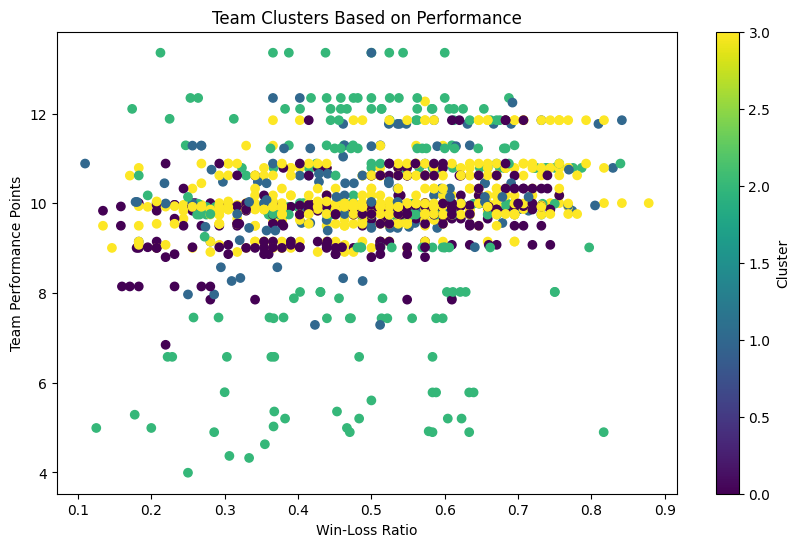

In [29]:
#@title **3.1 Using Team Performance Clustering Analysis for Game Prediction**
#@markdown - Teams that are Green Points have a Higher Chance of Losing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize features to prepare for clustering
scaler = StandardScaler()
features = full_data.drop(columns=['team', 'year'])  # Drop non-numeric columns for scaling
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
full_data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters based on selected features
plt.figure(figsize=(10, 6))

plt.scatter(full_data['win_loss_ratio'], full_data['team_performance_std'], c=full_data['cluster'], cmap='viridis', marker='o')
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Team Performance Points')
plt.title('Team Clusters Based on Performance')
plt.colorbar(label='Cluster')
plt.show()

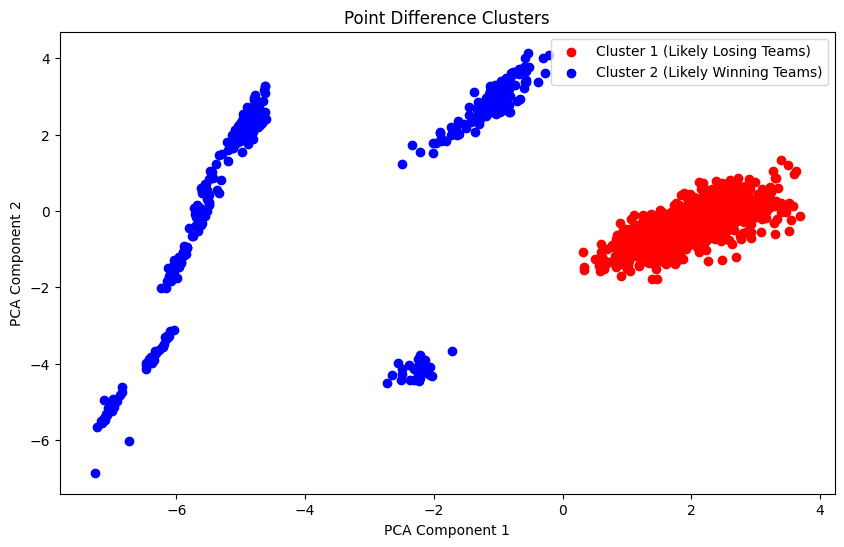

In [30]:
#@title **3.2 Using Point Difference Clustering Analysis for Game Prediction**
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1], color='red', label='Cluster 1 (Likely Losing Teams)')
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1], color='blue', label='Cluster 2 (Likely Winning Teams)')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Point Difference Clusters")
plt.legend()
plt.show()

In [31]:
#@title **3.3 Testing Point Difference Clustering on Game Prediction**
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Example data: Point differential, offensive and defensive stats for both teams
features = ['o_pts', 'o_oreb', 'o_reb', 'o_asts', 'd_pts', 'd_reb', 'd_asts']
team_data = {
    'LAL': [110, 8, 40, 23, 105, 35, 21],  # Example values for LAL
    'BOS': [112, 7, 42, 24, 104, 36, 22]   # Example values for BOS
}

# Create a dataframe with features and target (point differential)
data = [
    {'team': 'LAL', 'o_pts': 110, 'o_oreb': 8, 'o_reb': 40, 'o_asts': 23, 'd_pts': 105, 'd_reb': 35, 'd_asts': 21, 'point_diff': 5},
    {'team': 'BOS', 'o_pts': 112, 'o_oreb': 7, 'o_reb': 42, 'o_asts': 24, 'd_pts': 104, 'd_reb': 36, 'd_asts': 22, 'point_diff': 8}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Define feature columns and target
X = df[features]
y = df['point_diff']

# Train
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Prepare the data for prediction, ensuring it's in the right format
team_1_features = pd.DataFrame([team_data['LAL']], columns=features)
team_2_features = pd.DataFrame([team_data['BOS']], columns=features)

# Use model to predict the point differential
point_diff_team_1 = model.predict(team_1_features)[0]
point_diff_team_2 = model.predict(team_2_features)[0]

# Compare predicted point differential
print(f"Predicted point differential for LAL: {point_diff_team_1}")
print(f"Predicted point differential for BOS: {point_diff_team_2}")

# Decide winner based on predicted point differential
if point_diff_team_1 > point_diff_team_2:
    print("LAL is predicted to win.")
else:
    print("BOS is predicted to win.")


Predicted point differential for LAL: 5.84
Predicted point differential for BOS: 7.37
BOS is predicted to win.
